In [44]:
from qiskit import *
from TOKEN import ACCESS_TOKEN # get ibmq access token
%matplotlib inline

In [45]:
quantumBits = 2
classiclaBits = 2
qc = QuantumCircuit(quantumBits, classiclaBits) # create quantum circuit

In [46]:
# use quantum gates
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

In [47]:
# vitualize quantum gate
qc.draw() #output='mpl'

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [48]:
# get result from quantum computer simulator
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=sim)

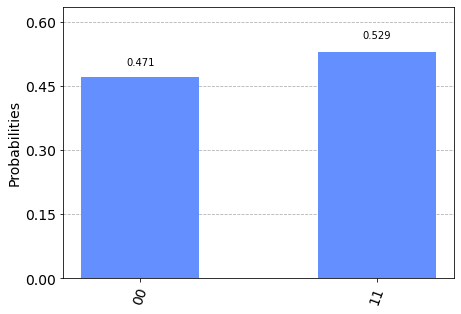

In [49]:
# visualize result
from qiskit.visualization import plot_histogram
plot_histogram(result.result().get_counts(qc))

In [50]:
# load account to use quantum computer
IBMQ.save_account(ACCESS_TOKEN)
IBMQ.load_account()

configrc.store_credentials:WARNING:2021-01-03 02:23:31,406: Credentials already present. Set overwrite=True to overwrite.
C:\ProgramData\Anaconda3\envs\Qiskit\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-01-03 02:23:32,303: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [51]:
# execute on real quantum computer
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)

In [52]:
from qiskit.tools.monitor import job_monitor
job_monitor(job) # get quantum computer queues

Job Status: job has successfully run


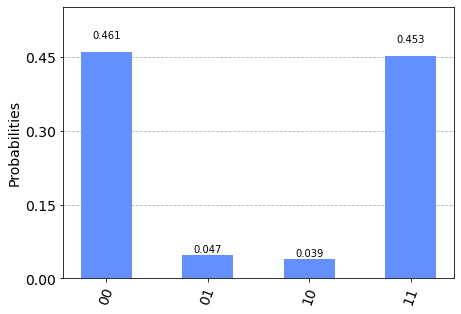

In [53]:
result = job.result() # get result from real quantum computer
plot_histogram(result.get_counts(qc)) # visualize result